In [1]:
#importing libraries : Pandas,numpy,string,regular expression,natural language tool kit,Scikit-learn,tensorflow,keras
import pandas as pd
import numpy as np
import string
import re
import nltk
#downloading the punctuations and stopwords from natural language toolkit
nltk.download('punkt')
nltk.download('stopwords')
#importing stopwords for the tweets
from nltk.corpus import stopwords

sw = stopwords.words('english')
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
#importing the layers required for the model
from tensorflow.keras.layers import Dense, LSTM,Bidirectional, Dropout,MaxPool2D,Conv1D,MaxPool1D,RNN,SimpleRNN,LSTMCell,TimeDistributed,GRU,GRUCell
#importing the label encoding
from sklearn.preprocessing import LabelEncoder
#importing tokenizers from natural language toolkit
from nltk.tokenize import word_tokenize, sent_tokenize
#importing the embedding layer
from keras.layers import Embedding
#importing metrics
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score
from tensorflow.keras import regularizers
from keras.regularizers import l2,l1
import matplotlib.pyplot as plt



[nltk_data] Downloading package punkt to /home/sanju/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/sanju/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
#reading the training dataset
data = pd.read_csv('train.csv')

In [3]:
#reading the training dataset
testdata = pd.read_csv('test.csv')

# New Section

In [4]:
#reading headers in training data
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
#removing the blank spaces
data = data.dropna()

In [6]:
#Assigning the text in the dataset to variable X
X = data['text']

In [7]:
#test variables
X_test=testdata['text']
y_test=testdata['sentiment']
y_test=LabelEncoder().fit_transform(y_test)

In [8]:
#Assigning the sentiment in the dataset to variable Y
y = data['sentiment']

In [9]:
y

0         neutral
1        negative
2        negative
3        negative
4        negative
5         neutral
6        positive
7         neutral
8         neutral
9        positive
10        neutral
11       positive
12       negative
13       negative
14        neutral
15       negative
16       negative
17       negative
18       negative
19        neutral
20        neutral
21       positive
22        neutral
23        neutral
24        neutral
25       positive
26       negative
27       negative
28       positive
29       negative
           ...   
27451    positive
27452     neutral
27453     neutral
27454    positive
27455    positive
27456    negative
27457     neutral
27458    positive
27459    positive
27460     neutral
27461    positive
27462    positive
27463    negative
27464    negative
27465    positive
27466     neutral
27467    positive
27468     neutral
27469     neutral
27470    negative
27471     neutral
27472    negative
27473     neutral
27474    positive
27475    p

In [10]:
#application of label encoding and tranforming y
y = LabelEncoder().fit_transform(y)


In [11]:
y


array([1, 0, 0, ..., 2, 2, 1])

In [12]:
#Coverting the string to lower case and iterating through the words and appending them to the list if the word is not a for X
X = X.str.lower()

lst = []
for phase_word in X:
    lst.append(" ".join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
X = lst

In [13]:
#Coverting the string to lower case and iterating through the words and appending them to the list if the word is not a for X_test
X_test = X_test.str.lower()

lst = []
for phase_word in X_test:
    lst.append(" ".join([re.sub('[0-9\W_]', '', word) for word in phase_word.split() if not word in sw]))
X_test = lst

In [14]:
#iterating through the word list for each sentence and assigning to tokens
for i in range(len(X)):
    X[i] = word_tokenize(X[i])

In [15]:
#iterating through the word list for each sentence and assigning to tokens
for i in range(len(X_test)):
    X_test[i] = word_tokenize(X_test[i])

In [16]:
X_train, X_val, y_train, y_val = train_test_split(np.array(X), y, test_size=0.2) 

/home/sanju/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [17]:
f = open('glove.6B.50d.txt')

embeddings_index = {}
cnt = 0
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float')
    embeddings_index[word] = coefs
f.close()

In [18]:
def embedding_output(X):
  max_len=50
  emb_dim=50
  embedding_out = np.zeros((len(X), max_len, emb_dim))
  for ix in range(len(X)):
    for ij in range(len(X[ix])):
      try:
        embedding_out[ix][ij] = embeddings_index[X[ix][ij].lower()]
      except: 
        embedding_out[ix][ij] = np.zeros((50, ))

  return embedding_out

In [19]:
#assigning embedding matrix for training and validation sets
embedding_matrix_train = embedding_output(X_train)
embedding_matrix_val = embedding_output(X_val)
embedding_matrix_test=embedding_output(X_test)

In [20]:
embedding_matrix_train.shape

(21984, 50, 50)

In [21]:
#creating the model for Tweet sentiment extraction and compiling it
model = Sequential()
model.add(RNN(GRUCell(10), input_shape=(50, 50)))
model.add(Dropout(0.4))
model.add(Dense(units=12, activation='softmax',kernel_regularizer='l1',bias_regularizer='l1'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
prediction=model.predict
hist = model.fit(embedding_matrix_train, y_train, epochs=15, validation_data=(embedding_matrix_val, y_val))


Epoch 1/15
687/687 [==============================] - 5s 7ms/step - loss: 1.6138 - accuracy: 0.3528 - val_loss: 1.3218 - val_accuracy: 0.4016
Epoch 2/15
687/687 [==============================] - 4s 5ms/step - loss: 1.3098 - accuracy: 0.4449 - val_loss: 1.2238 - val_accuracy: 0.5271
Epoch 3/15
687/687 [==============================] - 4s 6ms/step - loss: 1.2296 - accuracy: 0.4867 - val_loss: 1.1493 - val_accuracy: 0.5520
Epoch 4/15
687/687 [==============================] - 4s 6ms/step - loss: 1.1909 - accuracy: 0.4970 - val_loss: 1.1211 - val_accuracy: 0.5577
Epoch 5/15
687/687 [==============================] - 4s 6ms/step - loss: 1.1805 - accuracy: 0.4978 - val_loss: 1.1109 - val_accuracy: 0.5579
Epoch 6/15
687/687 [==============================] - 4s 6ms/step - loss: 1.1718 - accuracy: 0.5007 - val_loss: 1.1030 - val_accuracy: 0.5568
Epoch 7/15
687/687 [==============================] - 4s 6ms/step - loss: 1.1652 - accuracy: 0.5089 - val_loss: 1.0989 - val_accuracy: 0.5577
Epoch 

In [22]:
model.predict(embedding_matrix_val[0:10])

array([[0.16071875, 0.4027153 , 0.4125291 , 0.00267207, 0.00267093,
        0.00266858, 0.00267083, 0.00267152, 0.00266872, 0.0026702 ,
        0.00267176, 0.00267222],
       [0.28273657, 0.4666041 , 0.22297502, 0.00307747, 0.00307631,
        0.0030736 , 0.00307607, 0.00307692, 0.0030738 , 0.00307557,
        0.0030768 , 0.00307775],
       [0.42640725, 0.45086572, 0.0956687 , 0.00300782, 0.00300685,
        0.00300421, 0.00300647, 0.00300737, 0.00300444, 0.00300624,
        0.00300684, 0.00300818],
       [0.44937116, 0.44189155, 0.08216286, 0.002954  , 0.00295308,
        0.00295049, 0.00295268, 0.00295357, 0.00295072, 0.00295249,
        0.00295298, 0.00295438],
       [0.06857892, 0.27198917, 0.6432577 , 0.00179807, 0.00179722,
        0.00179561, 0.00179723, 0.00179764, 0.00179569, 0.00179665,
        0.00179806, 0.00179811],
       [0.32918698, 0.47023717, 0.1726836 , 0.00310057, 0.00309945,
        0.00309672, 0.00309916, 0.00310004, 0.00309694, 0.00309874,
        0.00309978,

In [23]:
y_val[0:10]

array([2, 1, 0, 1, 2, 0, 1, 1, 1, 1])

In [24]:
# Define metrics
y_pred = model.predict(embedding_matrix_test)
pred = []
for i in range(len(X_test)):
   pred.append(np.argmax(y_pred[i]))

In [25]:
pred = np.array(pred)

In [26]:
#calculating the f1 score for the model
f1_score(y_test, pred, average='macro')

0.6201762154583143

In [27]:
#calculating the recall score for the model
recall_score(y_test, pred, average='macro')

0.6162699796425998

In [28]:
#calculating the precision score for the model
precision_score(y_test, pred, average="macro")

0.7160211714065747

In [29]:
#calculating the accuracy score for the model
accuracy_score(y_test, pred)

0.644878324844369

In [30]:
#Display the architecture of the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rnn (RNN)                    (None, 10)                1860      
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 12)                132       
Total params: 1,992
Trainable params: 1,992
Non-trainable params: 0
_________________________________________________________________


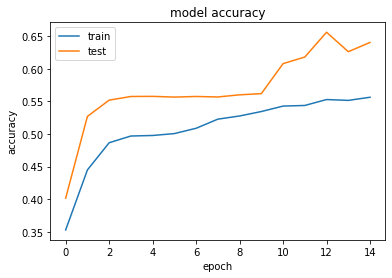

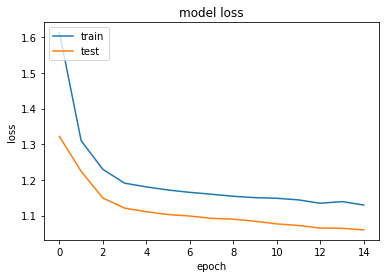

In [31]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()